In [1]:
!pip install -U gdown
import gdown
file_id = "12oJbYhO8losIkZirQUqkbJGtl7WvstH-"
output = "dataset.zip"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

import zipfile
with zipfile.ZipFile("dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

file_id = "1ey9CpldpHXRWH3jMzveW9K6tYyfCpNuy"
output = "metadata_summary.csv"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

!ls -l


Downloading...
From (original): https://drive.google.com/uc?id=12oJbYhO8losIkZirQUqkbJGtl7WvstH-
From (redirected): https://drive.google.com/uc?id=12oJbYhO8losIkZirQUqkbJGtl7WvstH-&confirm=t&uuid=d646c402-6fdb-4a5e-83b5-a16917a98020
To: /content/dataset.zip
 18%|█▊        | 479M/2.68G [00:12<00:37, 58.7MB/s]

KeyboardInterrupt: 

In [ ]:

! pip install ftfy regex tqdm
! pip install git+https://github.com/openai/CLIP.git
! pip install aif360 fairlearn
! pip install umap-learn
! pip install umap-learn[plot]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.2 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-1eemc8ad
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-1eemc8ad
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#importation des métas-donénes + labels
import pandas as pd

df_summary = pd.read_csv("metadata_summary.csv")
df_summary["filename"] = df_summary["filename"].apply(lambda x: x.split(".")[0])
df_summary.head()

,filename,age,gender,race,ethnicity,language,maritalstatus,note,gpt4_summary,glaucoma,use
0,data_00001,56.56,female,black,non-hispanic,english,single,ms. PERSON is a 56 yo woman presenting to esta...,The 56 y/o female patient has optic nerve head...,yes,training
1,data_00002,53.91,female,white,non-hispanic,english,single,referred for evaluation of narrow angles ou #p...,Patient was referred for narrow angle evaluati...,yes,training
2,data_00003,46.30,female,white,non-hispanic,english,single,1. left upper lid ptosis: occurred after botox...,"Patient experienced ptosis, ear and eye pain, ...",no,training
3,data_00004,66.52,male,white,non-hispanic,english,single,right plano +0.50 082 left LOCATION -0.50 83 a...,The patient has primary open angle glaucoma - ...,yes,training
4,data_00005,82.52,female,black,non-hispanic,english,divorced,in step. os with nonspecific peripheral defect...,The patient has nonspecific peripheral defects...,yes,training


In [ ]:
import os
import numpy as np
from PIL import Image

FOLDER_PATH = './dataset/Test'


IMAGE_EXTENSIONS = ['.png', '.jpg', '.jpeg']
data_list = []

for filename in os.listdir(FOLDER_PATH):
    if filename.endswith('.npz'):
        file_stem = os.path.splitext(filename)[0]
        npz_path = os.path.join(FOLDER_PATH, filename)
        npz_data = np.load(npz_path, allow_pickle=True)
        id = file_stem.split("_")[-1]


        data_entry = {
            "filename": file_stem,
            "slo_fundus": npz_data["slo_fundus"],
        }

        data_list.append(data_entry)

print(f"Loaded {len(data_list)} entries successfully.")
df = pd.DataFrame(data_list)
df = pd.merge(df, df_summary, on='filename', how='inner').drop(columns = ["use"])
df.head()


Loaded 2000 entries successfully.


,filename,slo_fundus,age,gender,race,ethnicity,language,maritalstatus,note,gpt4_summary,glaucoma
0,data_08293,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",17.29,female,white,non-hispanic,english,single,"a 17 y.o. white, non-hispanic female was evalu...","17-year-old white, non-Hispanic female diagnos...",yes
1,data_09585,"[[16, 16, 16, 18, 17, 17, 19, 19, 22, 18, 19, ...",72.44,female,white,unknown,english,divorced,"a 72 y.o. white, Unknown female was evaluated ...",72 y.o. white female diagnosed with glaucoma. ...,yes
2,data_09464,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",56.46,female,black,non-hispanic,english,divorced,56 y.o. f # PERSON spot PERSON/htn well-contro...,The patient is a 56-year-old female suspect fo...,no
3,data_08923,"[[30, 31, 32, 26, 27, 30, 32, 30, 32, 31, 36, ...",82.99,male,white,non-hispanic,english,married or partnered,"DATE_TIME - stable, no thinning - DATE_TIME - ...",The patient shows no signs of glaucoma or reti...,yes
4,data_08587,"[[7, 7, 6, 8, 5, 7, 7, 5, 4, 8, 7, 7, 6, 7, 6,...",48.43,female,white,non-hispanic,other,married or partnered,"status:19197::'cataract','incipient cataract',...","Patient has cataract, pseudophakia, aphakia in...",no


In [ ]:
import os
import clip
import torch
from PIL import Image, ImageEnhance, ImageFilter
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from umap import UMAP
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import roc_auc_score # Import roc_auc_score here

class RunCLIP:
  def __init__(self, images, model_name="ViT-B/32"):
    self.images = images
    self.device = "cuda" if torch.cuda.is_available() else "cpu"
    self.model, self.preprocess = clip.load(model_name, self.device)
    self.model_name = model_name
    self.run_result = None
    self.features = None

  def setClasses(self, classes_dict):
    self.classes_dict = classes_dict
    self.classes = []
    self.yes_class_index = -1
    for cat in classes_dict.values():
      for idx, c in enumerate(cat):
        self.classes.append(c[1])
        if c[1] == "yes":
            self.yes_class_index = len(self.classes) - 1

  def setModel(self, model):
    self.model = model
    self.device = "cuda" if torch.cuda.is_available() else "cpu"
    self.model.to(self.device)


  def _encode_image(self, image):
    image_input = self.preprocess(Image.fromarray(image.astype(np.uint8))).unsqueeze(0).to(self.device)
    with torch.no_grad():
        image_features = self.model.encode_image(image_input)
        image_features /= image_features.norm(dim=-1, keepdim=True)
    return image_features

  def _encode_text(self, text_list):
      text_inputs = torch.cat([clip.tokenize(text, truncate = True) for text in text_list]).to(self.device)
      with torch.no_grad():
          text_features = self.model.encode_text(text_inputs)
          text_features /= text_features.norm(dim=-1, keepdim=True)
      return text_features

  def _get_text_classes(self):
      return [f"{c[0]}" for category_list in self.classes_dict.values() for c in category_list]

  def _compute_similarity_with_metadata(self, image_features, metadata_text):
    text_meta_input = clip.tokenize([metadata_text]).to(self.device)
    with torch.no_grad():
      text_meta_features = self.model.encode_text(text_meta_input)
      text_meta_features /= text_meta_features.norm(dim=-1, keepdim=True)

    text_classes = self._get_text_classes()
    text_features = self._encode_text(text_classes)

    img_similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
    meta_similarity = (100.0 * text_meta_features @ text_features.T).softmax(dim=-1)

    return torch.max(img_similarity,meta_similarity)

  def _compute_similarity_standard(self, image_features):
      text_classes = self._get_text_classes()
      text_features = self._encode_text(text_classes)
      return (100.0 * image_features @ text_features.T).softmax(dim=-1)

  def _get_top_predictions(self, similarity, topk):
      values, indices = similarity[0].topk(topk)
      return values.cpu().detach().numpy(), indices.cpu().detach().numpy()

  def _create_description(self, indices, similarity, topk):
      desc = {k: None for k in self.classes_dict.keys()}

      for j in range(topk):
          predicted_class = self.classes[indices[j].item()]
          for k in desc.keys():
              if predicted_class in [c[1] for c in self.classes_dict[k]] and desc[k] is None:
                  desc[k] = predicted_class

      desc["similarity_score"] = similarity[0][self.yes_class_index].cpu().item()
      return desc

  def _plot_single_image_results(self, image, top_probs, top_classes, image_idx, n_rows, n_cols):
      plt.subplot(n_rows, n_cols, 2 * image_idx + 1)
      plt.imshow(image)
      plt.axis("off")

      plt.subplot(n_rows, n_cols, 2 * image_idx + 2)
      y = np.arange(top_probs.shape[-1])
      plt.grid()
      plt.barh(y, top_probs)
      plt.gca().invert_yaxis()
      plt.gca().set_axisbelow(True)
      plt.yticks(y, [self.classes[index] for index in top_classes])
      plt.xlabel("probability")

  def runPreds(self, topk=8, plot_preview=True, metadata_text=None):
      if metadata_text is not None:
          assert len(metadata_text) == len(self.images), \
          "Metadata text must have the same length as images."
      else:
          if not hasattr(self, 'classes'):
              raise ValueError("Classes not set. Call setClasses() first.")
          if self.yes_class_index == -1:
              raise ValueError("Could not find the 'yes' class index. Ensure 'yes' is in your classes_dict values.")

      topk = min(topk, len(self.classes))

      all_image_features = []
      images_desc = []
      all_top_probs = []
      all_top_classes = []

      for i, image in enumerate(self.images):
          image_features = self._encode_image(image)
          all_image_features.append(image_features.cpu().numpy().squeeze())

          if metadata_text is not None:
              similarity = self._compute_similarity_with_metadata(image_features, metadata_text[i])
          else:
              similarity = self._compute_similarity_standard(image_features)

          top_probs, top_classes = self._get_top_predictions(similarity, topk)
          all_top_probs.append(top_probs)
          all_top_classes.append(top_classes)

          desc = self._create_description(top_classes, similarity, topk)
          images_desc.append(desc)

      if plot_preview:
          num_images = min(10, len(self.images))

          plt.figure(figsize=(16, 16))
          n_cols = 4
          n_rows = (num_images + 1) // 2

          for i in range(num_images):
              self._plot_single_image_results(
                  self.images[i], all_top_probs[i], all_top_classes[i],
                  i, n_rows, n_cols
              )

          plt.subplots_adjust(wspace=0.5, hspace=0.5)
          plt.show()

      self.features = np.vstack(all_image_features)
      self.run_result = pd.DataFrame(images_desc)

  def export_to_csv(self, path):
      if self.run_result is None:
          raise ValueError("runPreds() has not been called yet.")
      self.run_result.to_csv(path, index=False)

  def plot_latent_space(self, label_col: str, n_neighbors: int = 3, min_dist: float = 0.1, random_state: int = 42):
      if self.run_result is None or self.features is None:
          raise ValueError("You must call runPreds() first.")

      if label_col not in self.run_result.columns:
          raise ValueError(f"Column '{label_col}' not found in run_result DataFrame.")

      X = self.features
      y = self.run_result[label_col].values

      valid_mask = pd.notnull(y)
      X = X[valid_mask]
      y = y[valid_mask]

      if len(X) == 0:
          print("No valid data points found for plotting latent space.")
          return

      X_scaled = StandardScaler().fit_transform(X)
      reducer = UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=random_state)
      embedding = reducer.fit_transform(X_scaled)
      unique_labels = np.unique(y)

      if len(unique_labels) > 20:
          print(f"Warning: Too many unique labels ({len(unique_labels)}). Plotting may not be clear.")

      cmap = plt.cm.get_cmap('tab20', len(unique_labels))
      color_map = {lbl: cmap(i) for i, lbl in enumerate(unique_labels)}

      plt.figure(figsize=(10, 8))
      for lbl in unique_labels:
          mask_lbl = (y == lbl)
          plt.scatter(embedding[mask_lbl, 0], embedding[mask_lbl, 1],
                    s=15, color=color_map[lbl], label=lbl, alpha=0.8)

      plt.gca().set_aspect('equal', 'datalim')
      plt.legend(title=label_col, bbox_to_anchor=(1.05, 1), loc='upper left')
      plt.title(f'UMAP of CLIP features colored by {label_col}', fontsize=14)
      plt.xlabel('UMAP 1', fontsize=12)
      plt.ylabel('UMAP 2', fontsize=12)
      plt.tight_layout()
      plt.show()

In [ ]:
# test = RunCLIP(list(df["slo_fundus"]))
# test.setClasses({
#    "pred": [("a medical picture of a person with glaucoma", "yes") , ("a medical picture of a person without glaucoma", "no")]
# })
# test.runPreds()

In [ ]:
# test.plot_latent_space("pred")

In [ ]:
# merge = df.copy().drop(columns = [c for c in df.columns if c != "glaucoma"])
# merge["pred"] = test.run_result["pred"]
# print(f"acc : { (merge['glaucoma'] == merge['pred']).sum() / len(merge)*100 : .2f}")

### Avec meta-donneés

In [ ]:
!pip install --upgrade transformers accelerate
!pip install bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 37.9 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.52.2
    Uninstalling transformers-4.52.2:
      Successfully uninstalled transformers-4.52.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 12.8 MB/s eta 0:00:00


In [ ]:
from transformers import CLIPTokenizer, AutoTokenizer, AutoModelForSeq2SeqLM, pipeline

clip_tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")
model_id = "Falconsai/text_summarization"
summarizer_tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForSeq2SeqLM.from_pretrained(model_id)
pipe = pipeline("summarization", model=model, tokenizer=summarizer_tokenizer, device=-1)

def needs_summarization(text, limit=72):
    clip_tokens = clip_tokenizer(text, return_tensors="pt", truncation=False, padding=False)
    return clip_tokens["input_ids"].shape[1] > limit

def summarize(note):
    if not needs_summarization(note):
        return note
    prompt = f"summarize and remove all mention of glaucoma: {note}"
    try:
        result = pipe(prompt, max_new_tokens=45, min_length=20, do_sample=False)[0]
        return result["summary_text"].strip()
    except Exception as e:
        print(f"Error summarizing note: {e}")
        return "SUMMARY_FAILED"

summaries = [summarize(note) for note in df["gpt4_summary"]]


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.49k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu
Your max_length is set to 200, but your input_length is only 96. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=48)
Your max_length is set to 200, but your input_length is only 111. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=55)
Token indices sequence length is longer than the specified maximum sequence length for this model (81 > 77). Running this sequence through the model will result in indexing errors
Your max_length is set to 200, but your input_length is only 101. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 200, but your input_len

In [ ]:
from google.colab import files
import re

with open("medical_notes_summaries_v1.txt", "w") as f:
    f.write("\\".join(summaries))
files.download("medical_notes_summaries_v1.txt")


def remove_spaces_near_punctuation(text):
    text = re.sub(r'\s+([.,;:!?])', r'\1', text)
    text = re.sub(r'([.,;:!?])\s+', r'\1', text)
    return text


summaries = []
try:
    with open("medical_notes_summaries_v1.txt", "r") as f:
        content = f.read().strip()
        summaries = content.split("\\")

except FileNotFoundError:
    print("Error: medical_notes_summaries_v1.text not found. Please generate it first.")
except Exception as e:
    print(f"An error occurred: {e}")

for i in range(len(summaries)):
  summaries[i] = remove_spaces_near_punctuation(summaries[i])

print(f"Loaded {len(summaries)} summaries.")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Loaded 2000 summaries.


In [ ]:
# clip_runner = RunCLIP(list(df["slo_fundus"]))
# clip_runner.setClasses({
#    "pred": [("A person diagnosed with glaucoma based on clinical findings.", "yes") ,
#     ("A person with no signs of glaucoma; vision appears normal.", "no")]
# })
# clip_runner.runPreds(metadata_text=summaries)

In [ ]:
# clip_runner.plot_latent_space("pred")

In [ ]:
# merge = df.copy().drop(columns = [c for c in df.columns if c != "glaucoma"])
# merge["pred"] = clip_runner.run_result["pred"]
# print(f"acc : { (merge['glaucoma'] == merge['pred']).sum() / len(merge)*100 : .2f}")
# print("Number of yes predictions :" ,(clip_runner.run_result["pred"]=="yes").sum())

In [ ]:
# resultat = clip_runner.run_result.copy()
# resultat["label"] = df["glaucoma"]
# resultat["race"] = df["race"]

# from sklearn.metrics import roc_auc_score

# for race, group_df in resultat.groupby("race"):
#     auc = roc_auc_score(group_df["label"], group_df["similarity_score"])
#     print(f"[{race}] AUC: {auc:.3f}")

In [ ]:
# df["pred"] = clip_runner.run_result["pred"]
# df.to_csv("df_test_with_preds.csv", index=False)

# Fine Tunning (ça arrive fort)

In [ ]:
!pip install ftfy regex tqdm
!pip install torchvision

In [ ]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader


class GlaucomaDataset(Dataset):
    def __init__(self, use_split, dataset_root, metadata_path, preprocess):
        self.use_split = use_split.lower()
        self.root_dir = os.path.join(dataset_root, use_split.capitalize())
        self.annotations = pd.read_csv(metadata_path)
        self.annotations["use"] = self.annotations["use"].str.strip().str.lower()
        self.annotations = self.annotations[self.annotations["use"] == self.use_split]
        self.annotations = self.annotations[self.annotations["filename"].str.lower().str.endswith('.npz')]
        self.annotations = self.annotations.reset_index(drop=True)
        self.preprocess = preprocess

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        npz_path = os.path.join(self.root_dir, self.annotations.iloc[idx]["filename"])
        npz_data = np.load(npz_path, allow_pickle=True)
        image_data = npz_data["slo_fundus"]
        image = self.preprocess(Image.fromarray(image_data.astype(np.uint8)).convert("RGB"))
        text = "image of an eye with glaucoma" if self.annotations.iloc[idx]["glaucoma"] == "yes"  else "image of an eye without glaucoma"     #text to associate to the image
        return image, text

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

dataset_root = "/content/dataset"
metadata_path = "/content/metadata_summary.csv"

train_dataset = GlaucomaDataset("training", dataset_root, metadata_path, preprocess)
val_dataset   = GlaucomaDataset("validation", dataset_root, metadata_path, preprocess)
test_dataset  = GlaucomaDataset("test", dataset_root, metadata_path, preprocess)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=32)

In [ ]:
import torch
from torch import nn, optim
import clip

# Fix temperature parameter BEFORE training
if hasattr(model, 'logit_scale'):
    print(f"Original logit_scale: {model.logit_scale.exp().item():.4f}")
    # Reset to a much smaller, safer value
    model.logit_scale.data.fill_(2.6592)  # ln(14.29) ≈ 2.6592, safer default
    # Freeze the temperature parameter to prevent it from growing during training
    model.logit_scale.requires_grad = False
    print(f"Fixed logit_scale: {model.logit_scale.exp().item():.4f}")
    print("Temperature parameter frozen during training")

# Ensure model is in training mode with gradients enabled
model.train()

# Freeze most of the model and only train the final layers
for name, param in model.named_parameters():
    param.requires_grad = False  # Freeze everything first

# Only unfreeze the safest parameters (layer norms and final projections)
trainable_params = []
for name, param in model.named_parameters():
    # Only train layer normalization parameters and avoid projection layers initially
    if any(layer in name for layer in ['ln_final', 'ln_1', 'ln_2']) and 'weight' in name:
        param.requires_grad = True
        trainable_params.append(name)
        print(f"Training parameter: {name} - Shape: {param.shape}")

print(f"Total trainable parameters: {len(trainable_params)}")

# If no trainable parameters found, add the safest ones
if len(trainable_params) == 0:
    print("No layer norm parameters found, using minimal set...")
    for name, param in model.named_parameters():
        if 'ln_final' in name:
            param.requires_grad = True
            trainable_params.append(name)
            print(f"Training parameter: {name} - Shape: {param.shape}")


loss_img = nn.CrossEntropyLoss()
loss_txt = nn.CrossEntropyLoss()

trainable_params_list = [p for p in model.parameters() if p.requires_grad]
if len(trainable_params_list) == 0:
    print("WARNING: No trainable parameters found! Training will have no effect.")
    for name, param in model.named_parameters():
        if 'ln_final' in name and 'weight' in name:
            param.requires_grad = True
            trainable_params_list.append(param)
            break

optimizer = optim.Adam(trainable_params_list, lr=1e-4, eps=1e-8)
print(f"Optimizer created with {len(trainable_params_list)} trainable parameters")


for epoch in range(5):
    model.train()
    total_loss = 0
    num_batches = 0

    for batch_idx, (images, texts) in enumerate(train_loader):
        images = images.to(device)
        texts = clip.tokenize(texts).to(device)

        logits_per_image, logits_per_text = model(images, texts)

        logits_per_image = torch.clamp(logits_per_image, -20, 20)
        logits_per_text = torch.clamp(logits_per_text, -20, 20)

        if logits_per_image.abs().max() > 15 or logits_per_text.abs().max() > 15:
            print(f"Warning: Large logits detected - Image: {logits_per_image.abs().max():.2f}, Text: {logits_per_text.abs().max():.2f}")


        # Debug: Check logits range (remove after confirming fix works)
        if batch_idx == 0:  # Only print for first batch to avoid spam
            print(f"Epoch {epoch+1}, Batch {batch_idx}: Logits range - Image: [{logits_per_image.min():.2f}, {logits_per_image.max():.2f}], Text: [{logits_per_text.min():.2f}, {logits_per_text.max():.2f}]")

        # Ground truth labels (diagonal matching)
        ground_truth = torch.arange(len(images), device=device)

        loss_img_val = loss_img(logits_per_image, ground_truth)
        loss_txt_val = loss_txt(logits_per_text, ground_truth)
        loss = (loss_img_val + loss_txt_val) / 2

        if torch.isnan(logits_per_image).any() or torch.isnan(logits_per_text).any():
            print(f"NaN in logits detected at epoch {epoch+1}, batch {batch_idx}")
            break


        if torch.isnan(loss):
            print(f"NaN loss detected at epoch {epoch+1}, batch {batch_idx}")
            print(f"Loss img: {loss_img_val.item()}, Loss txt: {loss_txt_val.item()}")
            break

        optimizer.zero_grad()
        loss.backward()

        # Check for NaN gradients before clipping (only check trainable params)
        nan_grads = False
        for name, param in model.named_parameters():
            if param.requires_grad and param.grad is not None and torch.isnan(param.grad).any():
                print(f"NaN gradient detected in {name}")
                nan_grads = True
                # Zero out the bad gradient instead of skipping
                param.grad.zero_()
                print(f"Zeroed gradient for {name}")

        # Always continue with the update (even if we had to zero some gradients)


        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)  # More aggressive clipping
        optimizer.step()


        for name, param in model.named_parameters():
            if param.requires_grad and torch.isnan(param).any():
                print(f"NaN parameter detected in {name} after update")
                # Reset this parameter to prevent cascade failure
                nn.init.normal_(param.data, mean=0, std=0.01)
                print(f"Reset parameter {name} to prevent cascade failure")
                break

        total_loss += loss.item()
        num_batches += 1


    if num_batches > 0:
        avg_loss = total_loss / num_batches
        print(f"Epoch {epoch + 1} - Loss: {avg_loss:.4f}")
    else:
        print(f"Epoch {epoch + 1} - Training stopped due to NaN")
        break

Original logit_scale: 100.0000
Fixed logit_scale: 14.2849
Temperature parameter frozen during training
Training parameter: visual.transformer.resblocks.0.ln_1.weight - Shape: torch.Size([768])
Training parameter: visual.transformer.resblocks.0.ln_2.weight - Shape: torch.Size([768])
Training parameter: visual.transformer.resblocks.1.ln_1.weight - Shape: torch.Size([768])
Training parameter: visual.transformer.resblocks.1.ln_2.weight - Shape: torch.Size([768])
Training parameter: visual.transformer.resblocks.2.ln_1.weight - Shape: torch.Size([768])
Training parameter: visual.transformer.resblocks.2.ln_2.weight - Shape: torch.Size([768])
Training parameter: visual.transformer.resblocks.3.ln_1.weight - Shape: torch.Size([768])
Training parameter: visual.transformer.resblocks.3.ln_2.weight - Shape: torch.Size([768])
Training parameter: visual.transformer.resblocks.4.ln_1.weight - Shape: torch.Size([768])
Training parameter: visual.transformer.resblocks.4.ln_2.weight - Shape: torch.Size([768

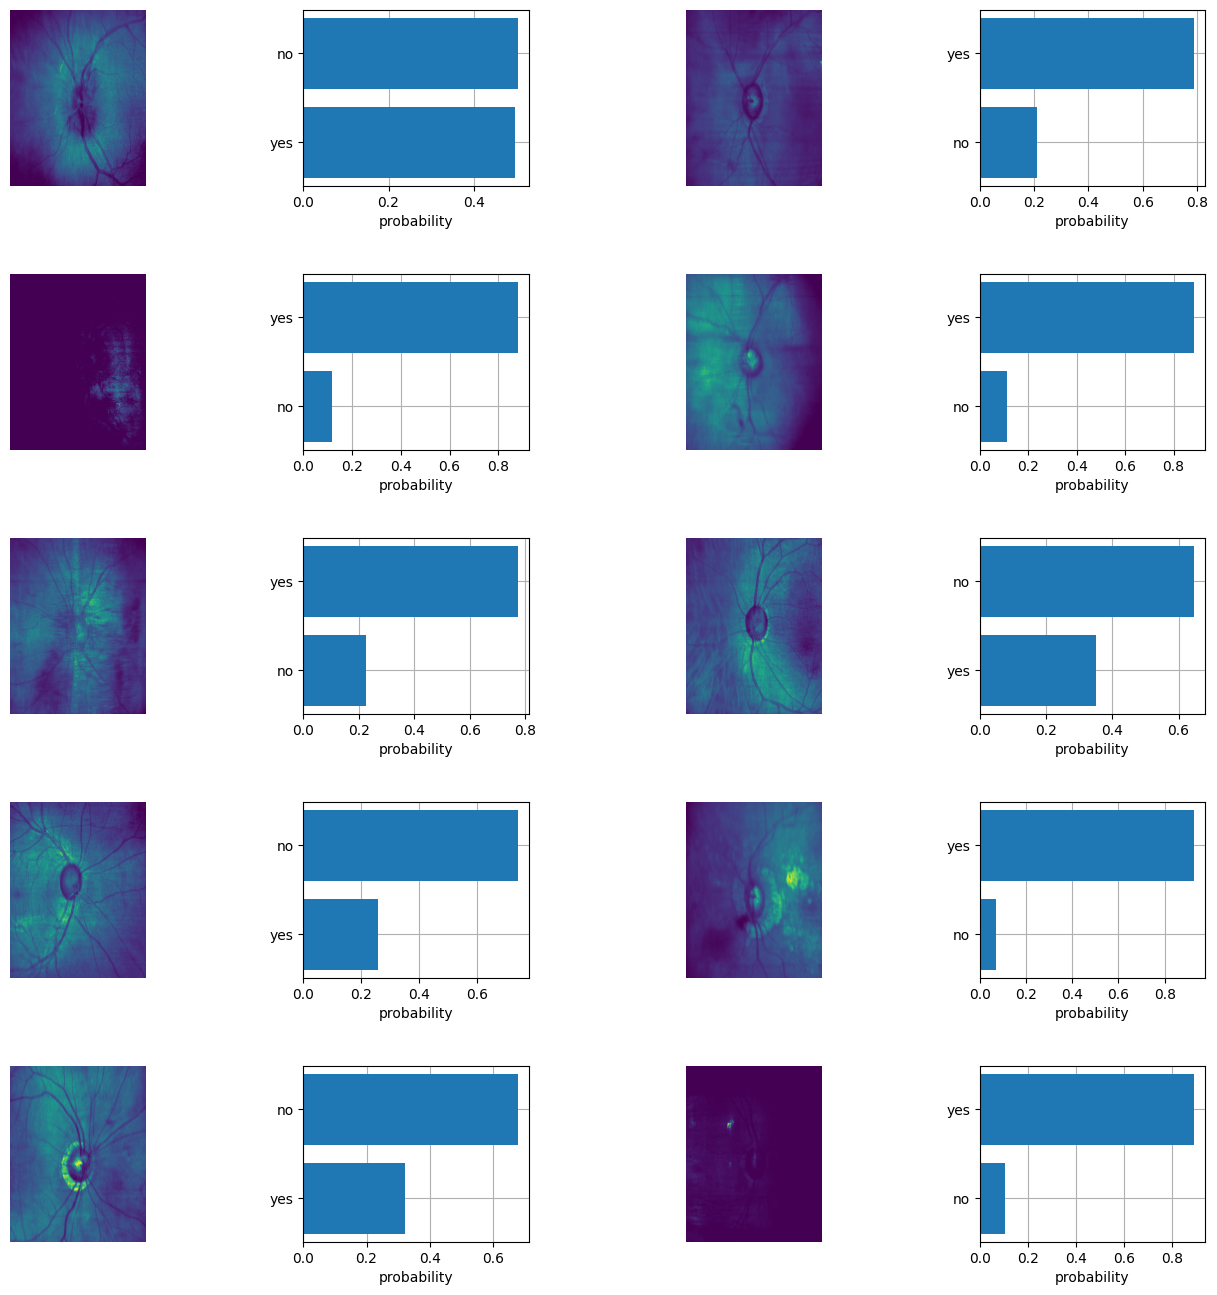

In [ ]:
test = RunCLIP(list(df["slo_fundus"]))
test.setModel(model)
test.setClasses({
   "pred": [("a medical picture of a person with glaucoma", "yes") , ("a medical picture of a person without glaucoma", "no")]
})
test.runPreds()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
<ipython-input-5-f2256165ff9f>:187: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', len(unique_labels))


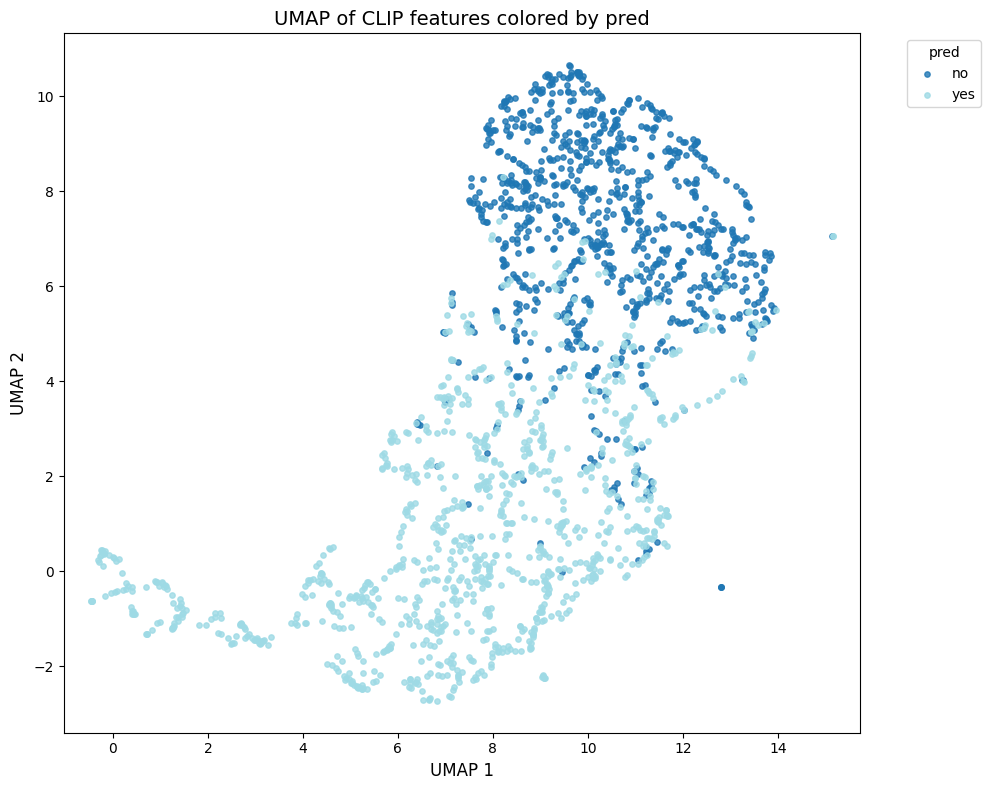

In [ ]:
test.plot_latent_space("pred")

In [ ]:
merge = df.copy().drop(columns = [c for c in df.columns if c != "glaucoma"])
merge["pred"] = test.run_result["pred"]
print(f"acc : { (merge['glaucoma'] == merge['pred']).sum() / len(merge)*100 : .2f}")

acc :  65.80


In [ ]:
df_fine_tuned_preds = df.copy()
df_fine_tuned_preds["pred"] = test.run_result["pred"]
df_fine_tuned_preds.to_csv("df_fine_tuned_preds.csv", index=False)